---
### Gender Dictionary

In [62]:
import pandas as pd

df = pd.read_csv("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/ordlisteFuldform2021rettet.csv")
df.head()

,ord1,ord2,bøjning
0,A,A,sb.
1,A,A'et,sb.
2,A,A'ets,sb.
3,A,A's,sb.
4,A,A'erne,sb.


In [63]:
from tqdm import tqdm
# "en" is fællenskøn
dictionary_is_fælleskøn = {}

for i, row in tqdm(df.iterrows()):
    if row['bøjning'] == "sb." and i > 0 and row['ord1'] != df.iloc[i-1]['ord1']:
        word = df.iloc[i+1]['ord2']
        dictionary_is_fælleskøn[df.iloc[i+1]['ord1']] = True if word[-1] == "n" else False


415437it [00:15, 25993.13it/s]


In [64]:
dictionary_is_fælleskøn

{'a': False,
 'A3-format': False,
 'A4-format': False,
 'A5-format': False,
 'A-aktie': True,
 'abandonnering': True,
 'abbed': True,
 'abbedi': False,
 'abbedisse': True,
 'ABC': True,
 'abc': True,
 'abdicering': True,
 'abdikation': True,
 'abe': True,
 'abefest': True,
 'abekat': True,
 'abekattestreg': True,
 'abemenneske': False,
 'aber dabei': False,
 'aberration': True,
 'abessiner': True,
 'abessinier': True,
 'abetræ': False,
 'abkhaser': True,
 'ablativ': True,
 'abnormitet': True,
 'a-bombe': True,
 'abonnement': False,
 'abonnent': True,
 'abonnering': True,
 'abonnine': True,
 'aboriginal': True,
 'aboriginer': True,
 'aborre': True,
 'abort': True,
 'abortmodstander': True,
 'abracadabra': False,
 'A-brev': False,
 'abrikos': True,
 'ABS': True,
 'abs': True,
 'absces': True,
 'abscisse': True,
 'abscisseakse': True,
 'absence': True,
 'absentation': True,
 'absentering': True,
 'absint': True,
 'absolut': False,
 'absolution': True,
 'absolutisme': True,
 'absolutist': 

In [65]:
import pickle

with open("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/GenderDict.pickle", "wb") as f:
    pickle.dump(dictionary_is_fælleskøn, f)

---
### Stem dicts

In [66]:
# Substantiv

sb_dict = {}
current_lst = []
for i, row in tqdm(df.iterrows()):
    if row['bøjning'] == "sb." and row['ord1'] == df.iloc[i-1]['ord1']:
        first_word = row['ord1']
        current_lst += [row['ord2']]
        if row['ord1'] not in current_lst:
            current_lst += [row['ord1']]
    elif len(current_lst) > 0:
        for value in list(set(current_lst)):
            sb_dict[value] = first_word
        current_lst = []
        first_word = ""
    elif row['bøjning'] == "sb.":
        first_word = row['ord1']
        current_lst += [row['ord1'], row['ord2']]


415437it [00:16, 25862.72it/s]


In [67]:
sb_dict

{"A'ets": 'A',
 "A'ers": 'A',
 'A': 'A',
 "A's": 'A',
 "A'erne": 'A',
 "A'ernes": 'A',
 "A'er": 'A',
 "A'et": 'A',
 "a'erne": 'a',
 "a'er": 'a',
 'a': 'a',
 "a'ers": 'a',
 "a's": 'a',
 "a'ernes": 'a',
 "a'ets": 'a',
 "a'et": 'a',
 'A3-format': 'A3-format',
 'A3-formats': 'A3-format',
 'A3-formatets': 'A3-format',
 'A3-formatet': 'A3-format',
 'A4-format': 'A4-format',
 'A4-formatets': 'A4-format',
 'A4-formatet': 'A4-format',
 'A4-formats': 'A4-format',
 'A5-format': 'A5-format',
 'A5-formatets': 'A5-format',
 'A5-formatet': 'A5-format',
 'A5-formats': 'A5-format',
 'A-aktierne': 'A-aktie',
 'A-aktien': 'A-aktie',
 'A-aktiernes': 'A-aktie',
 'A-aktier': 'A-aktie',
 'A-akties': 'A-aktie',
 'A-aktiens': 'A-aktie',
 'A-aktiers': 'A-aktie',
 'A-aktie': 'A-aktie',
 'abandonneringen': 'abandonnering',
 'abandonnering': 'abandonnering',
 'abandonneringer': 'abandonnering',
 'abandonneringerne': 'abandonnering',
 'abandonneringers': 'abandonnering',
 'abandonneringens': 'abandonnering',
 'aban

In [68]:
with open("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/SbStemDict.pickle", "wb") as f:
    pickle.dump(sb_dict, f)

In [69]:
# verbs

import pandas as pd

df = pd.read_csv("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/ordlisteFuldform2021rettet.csv")
df = df

vb_dict = {}
stem_to_bøjninger = {}
nutids_r = {}
nutids_r_stem = {}
current_lst = []
lengths = []
for i, row in tqdm(df.iterrows()):
    if row['bøjning'] == "vb." and row['ord1'] == df.iloc[i-1]['ord1']:
        first_word = row['ord1']
        if row['ord2'] not in current_lst:
            current_lst += [row['ord2']]
        if first_word not in current_lst:
            current_lst += [first_word]
    elif len(current_lst) > 0:
        for value in current_lst:
            vb_dict[value] = first_word
        #print(current_lst[0], current_lst[1], current_lst[0] == current_lst[1])
        if current_lst[0] == current_lst[1]:
            current_lst = current_lst[1:]
        stem_to_bøjninger[first_word] = current_lst
        #print(current_lst)
        lengths.append(len(current_lst))
        infinitiv = current_lst[0]
        nutids_r_word = ""
        for word in current_lst:
            if word == infinitiv + "r":
                nutids_r_word = word
                break
        if len(nutids_r_word) > 0:
            nutids_r[first_word] = [infinitiv, nutids_r_word]
            nutids_r_stem[infinitiv] = first_word
            nutids_r_stem[nutids_r_word] = first_word
        current_lst = []
        first_word = ""
    elif row['bøjning'] == "vb.":
        first_word = row['ord1']
        current_lst += [row['ord1'], row['ord2']]

415437it [00:10, 41203.04it/s]


(array([1.000e+00, 5.000e+01, 1.200e+01, 5.000e+00, 1.900e+01, 1.100e+02,
        3.080e+02, 6.121e+03, 2.880e+02, 3.300e+01, 8.200e+01, 9.000e+00]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.]),
 <BarContainer object of 12 artists>)

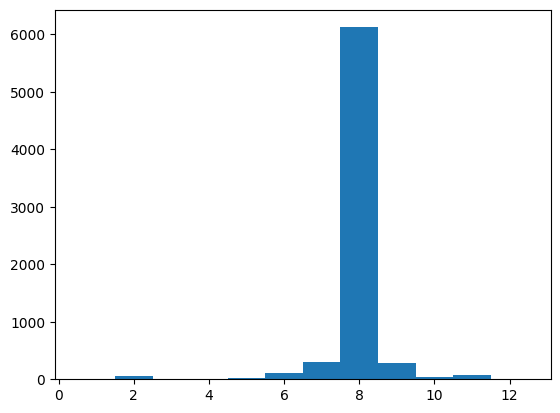

In [70]:
import numpy as np
import matplotlib.pyplot as plt
numbers = lengths
plt.hist(numbers, bins=np.arange(min(numbers), max(numbers)+1), align='left')

In [71]:
vb_dict

{'abandonnere': 'abandonnere',
 'abandonner': 'abandonnere',
 'abandonneret': 'abandonnere',
 'abandonnerer': 'abandonnere',
 'abandonnerende': 'abandonnere',
 'abandonnerede': 'abandonnere',
 'abandonneres': 'abandonnere',
 'abandonneredes': 'abandonnere',
 'abdicere': 'abdicere',
 'abdicer': 'abdicere',
 'abdiceret': 'abdicere',
 'abdicerer': 'abdicere',
 'abdicerende': 'abdicere',
 'abdicerede': 'abdicere',
 'abdiceres': 'abdicere',
 'abdiceredes': 'abdicere',
 'abe': 'abe',
 'ab': 'abe',
 'abet': 'abe',
 'aber': 'abe',
 'abende': 'abe',
 'abede': 'abe',
 'abes': 'abe',
 'abedes': 'abe',
 'abonnere': 'abonnere',
 'abonner': 'abonnere',
 'abonneret': 'abonnere',
 'abonnerer': 'abonnere',
 'abonnerende': 'abonnere',
 'abonnerede': 'abonnere',
 'abonneres': 'abonnere',
 'abonneredes': 'abonnere',
 'abortere': 'abortere',
 'aborter': 'abortere',
 'aborteret': 'abortere',
 'aborterer': 'abortere',
 'aborterende': 'abortere',
 'aborterede': 'abortere',
 'aborteres': 'abortere',
 'abortere

In [72]:
stem_to_bøjninger

{'abandonnere': ['abandonnere',
  'abandonner',
  'abandonneret',
  'abandonnerer',
  'abandonnerende',
  'abandonnerede',
  'abandonneres',
  'abandonneredes'],
 'abdicere': ['abdicere',
  'abdicer',
  'abdiceret',
  'abdicerer',
  'abdicerende',
  'abdicerede',
  'abdiceres',
  'abdiceredes'],
 'abe': ['abe', 'ab', 'abet', 'aber', 'abende', 'abede', 'abes', 'abedes'],
 'abonnere': ['abonnere',
  'abonner',
  'abonneret',
  'abonnerer',
  'abonnerende',
  'abonnerede',
  'abonneres',
  'abonneredes'],
 'abortere': ['abortere',
  'aborter',
  'aborteret',
  'aborterer',
  'aborterende',
  'aborterede',
  'aborteres',
  'aborteredes'],
 'absentere': ['absentere',
  'absenter',
  'absenteret',
  'absenterer',
  'absenterende',
  'absenterede',
  'absenteres',
  'absenteredes'],
 'absorbere': ['absorbere',
  'absorber',
  'absorberet',
  'absorberer',
  'absorberende',
  'absorberede',
  'absorberes',
  'absorberedes'],
 'abstrahere': ['abstrahere',
  'abstraher',
  'abstraheret',
  'abst

In [73]:
nutids_r

{'abandonnere': ['abandonnere', 'abandonnerer'],
 'abdicere': ['abdicere', 'abdicerer'],
 'abe': ['abe', 'aber'],
 'abonnere': ['abonnere', 'abonnerer'],
 'abortere': ['abortere', 'aborterer'],
 'absentere': ['absentere', 'absenterer'],
 'absorbere': ['absorbere', 'absorberer'],
 'abstrahere': ['abstrahere', 'abstraherer'],
 'accelerere': ['accelerere', 'accelererer'],
 'accentuere': ['accentuere', 'accentuerer'],
 'acceptere': ['acceptere', 'accepterer'],
 'adaptere': ['adaptere', 'adapterer'],
 'addere': ['addere', 'adderer'],
 'adfærdsregulere': ['adfærdsregulere', 'adfærdsregulerer'],
 'adgangsbegrænse': ['adgangsbegrænse', 'adgangsbegrænser'],
 'adhærere': ['adhærere', 'adhærerer'],
 'adjungere': ['adjungere', 'adjungerer'],
 'adle': ['adle', 'adler'],
 'adlyde': ['adlyde', 'adlyder'],
 'administrere': ['administrere', 'administrerer'],
 'adoptere': ['adoptere', 'adopterer'],
 'adressere': ['adressere', 'adresserer'],
 'adskille': ['adskille', 'adskiller'],
 'adsorbere': ['adsorbe

In [74]:
import pickle

with open("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/VbStemDict.pickle", "wb") as f:
    pickle.dump(vb_dict, f)
with open("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/VbStemToBøjningDict.pickle", "wb") as f:
    pickle.dump(stem_to_bøjninger, f)
with open("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/nutids_r.pickle", "wb") as f:
    pickle.dump(nutids_r, f)
with open("/Users/lucasvilsen/Desktop/GrammatikTAK/Datasets/nutids_r_stem.pickle", "wb") as f:
    pickle.dump(nutids_r_stem, f)